<p align="center">
    <img align="center" src="../../_Templates/_Resources/top-banner.svg">
</p>

# <span style="color:#484848;"> PPG from Smartphone Camera </span>

### <span style="color:#484848;"> How to measure and visualize your PPG using the smartphone's camera </span> 

### <span style="color:#00aba1;"> Keywords </span>
`Photoplethysmography (PPG)`, `Smartphone`, `Camera`

### <span style="color:#00aba1;"> Notebook Info </span>

**Author(s):** Afonso Raposo

**Date of creation:** 17/01/2021

**Last update:** 17/01/2021

**Last revision:** 17/01/2021

![Graphical Abstract](_Resources/PPG_camera.jpg)
<p style="text-align:center"> <i> Recording your PPG. [1] </i> </p>

### <span style="color:#00aba1;"> Description </span>
Nowadays, almost everyone has one smartphone. These devices are equipped with powerful cameras and a white light source, the flash LED, and are capable of recording videos at 30 frames per second. Placing the finger over the phone flash and black camera, the volume changes of blood flow are noticeable on the intensity of the video and it is possible to extract the photoplethysmogram from this source.

### <span style="color:#00aba1;"> Requirements </span>

* Basic knowledge of Python

### <span style="color:#00aba1;"> Materials</span>

* Python 3.5 (or higher)
* matplotlib
* numpy
* opencv-python
* Smartphone (optional)

# <span style="color:#00aba1;"> 1. Photoplethysmography (PPG) </span>

The photoplethysmogram (PPG) is a widely used medical exam which is capable of measuring blood volume changes.
A light source illuminates the finger and the transmitted or reflected light is measured.
Blood contains hemoglobyn which absorves light with wavelengths in the visible spectrum. The absorption is depedent of the incident wavelength as can be seen in the following Figure:

![PPG](_Resources/XNoJQ7U.png)
<p style="text-align:center"> <i> Hemoglobin's absorbtion spectrum. </i> </p>

When emitting light to the finger, the surrounding tissues also reflect part of the light, but, since these tissues are static, the amount of light reflected is constant and constitutes a DC signal. When there is an increase in blood flow, e.g., during cardiac systole, the volume of blood in the finger blood vessels increases, resulting in a variation of the level of light reflected, generating an AC signal, which is time-dependent.
The PPG signal results from this AC signal and it is possible to retrieve it using only the smartphone flash which acts as a light source and the phone camera which acts as a light sensor.

# <span style="color:#00aba1;"> 2. Prepare your Python environment </span>

In this section, the required libraries should be installed, using the command:

In [ ]:
!pip install matplotlib numpy opencv-python biosppy

and imported:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import biosppy.signals.tools as st

# <span style="color:#00aba1;"> 3. Perform an acquisition </span>

This step is optional. If you wish to use the example video, download it [here](https://raw.githubusercontent.com/PIA-Group/ScientIST-notebooks/master/_Resources/ppg.mp4), or run the following command:

```python
!wget -P ~/Downloads/ 'https://raw.githubusercontent.com/PIA-Group/ScientIST-notebooks/master/_Resources/ppg.mp4'
``` 

To acquire a valid video for PPG extraction, you must place the finger over your phone flash and back camera, totally covering both of them.

![PPG_finger](_Resources/UtfXJVP.jpg)
<p style="text-align: center;"><i>How to place your finger in the camera [1]. </i></p>

Then, you must remain very still and record a video. A short clip, about 10 seconds, is more than enough for this experiment.
After the acquisition, you should copy the video file to your computer.

# <span style="color:#00aba1;"> 4. Import the data </span>

Let's first define the video's path:

In [5]:
video_path = 'resources/ppg.mp4'

> ⚠️ **WARNING:** You must set the correct path to your video file or to the file downloaded to your computer 

Now we load the video:

In [6]:
video = cv2.VideoCapture(video_path)
fs = 30 # sampling rate, 30 FPS
success, image = video.read()
if not success:
    raise ValueError('Failed reading video')

# <span style="color:#00aba1;"> 5. Extract the PPG signal </span>

To extract the PPG signal from the video, we will store it in an array. Since the array will store the values of our PPG signal,  its length is the same as the number of frames of the video.

In [7]:
nr_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
ppg = np.zeros((nr_frames))

We'll now iterate over every frame of the video with a while loop. We keep track of the frame number so we know the correct position of the ppg array to store the computed value in.

For every frame, the average pixel intensity value is computed. In this case, we use the red channel since it translates into a good signal.

Every frame is represented in a 3-dimensional matrix, named image in our code. The first two dimensions correspond to the rows and columns of the image and the last dimension corresponds to the different color channels. OpenCV uses the BGR color format, which means that the red channel will be the third channel of our matrix.

In [8]:
n = 0
while success:
    red = image[..., 2]
    ppg[n] = np.mean(red)
    print(".",end='') # print progress
    n+=1
    success, image = video.read()

.........................................................................................................................................................................................................................

> 📋 **NOTE:** The execution of this snippet may take a while    

# <span style="color:#00aba1;"> 6. Visualize your signal! </span>

You now have the average value of each red frame stored in the `ppg` array. This array represents the PPG signal and can be easily plotted.

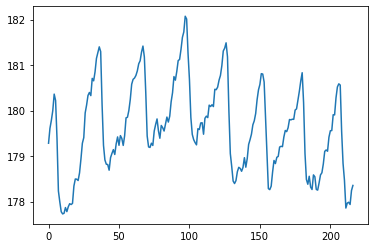

In [16]:
plt.plot(ppg)
plt.show()

The PPG signal is typically display inverted, which is easily accomplishable:

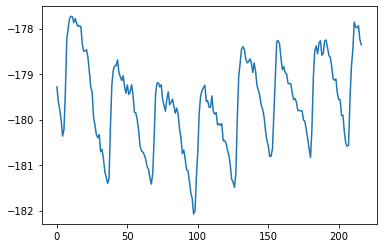

In [17]:
ppg_inverted = -ppg
plt.plot(ppg_inverted)
plt.show()

# <span style="color:#00aba1;"> 7. Improve the PPG signal </span>

A band-pass filter can be applied to improve the quality of the signal and also remove the DC offset. Using the BioSPPy toolbox this is simple to do.

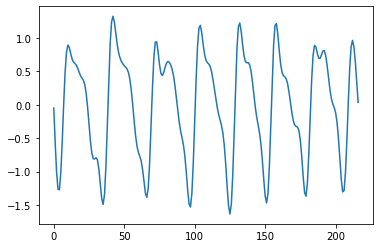

In [18]:
ppg_filtered, _, _ = st.filter_signal(
    signal=ppg_inverted,
    ftype="butter",
    band="bandpass",
    order=4,
    frequency=[0.7, 4],
    sampling_rate=fs)

plt.plot(ppg_filtered)
plt.show()

> 💡 **EXPLORE:** Challenge yourself! Try to compute the heart rate from the acquired PPG signal.

# <span style="color:#00aba1;"> Summary </span>

🎉 Congratulations! With this article, you:

* Understood how PPG is measured
* Learned how to iterate and process each frame of a video
* Learned how to extract the PPG signal from a video

### References:

1. Chan, Pak Hei et al. (2016). Diagnostic Performance of a Smartphone‐Based Photoplethysmographic Application for Atrial Fibrillation Screening in a Primary Care Setting. Journal of the American Heart Association.


<p align="center">
  <img style="height:2.5cm" align="center" src="../../_Templates/_Resources/bottom-banner.png">
</p>